In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dmap = np.load("../data/sealion/TrainDensity/872_2.npz")["dmap"]

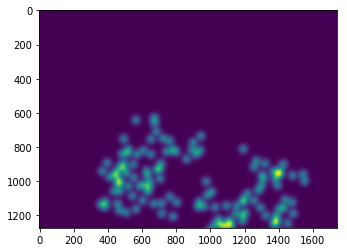

In [3]:
plt.imshow(dmap[:,:,2])

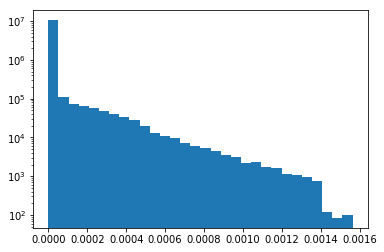

In [4]:
plt.yscale('log')
_ = plt.hist(dmap.ravel(), bins=30)

In [5]:
dmap_log = np.log(dmap + 1e-9)

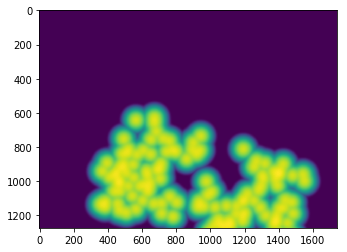

In [6]:
plt.imshow(dmap_log[:,:,2])

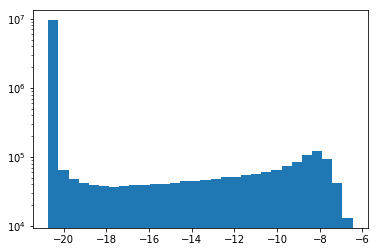

In [7]:
plt.yscale('log')
_ = plt.hist(dmap_log.ravel(), bins=30)

In [8]:
def quantize(x, nbins, vmin, vmax):
    """ Transorm each value x[i] into an integer xq[i] in [0, nbins-1]
    """
    q = (vmax - vmin)/(nbins-1)
    k = np.floor((x - vmin)/q)
    return k.astype(np.int32)

In [9]:
def dequantize(x, nbins, vmin, vmax):
    q = (vmax - vmin)/(nbins-1)
    return (x * q) + vmin

In [10]:
def to_log_space(x):
    return np.log(x + 1e-9)

In [11]:
def from_log_space(x):
    return np.exp(x) - 1e-9

In [24]:
nbins = 128
lmin = np.min(dmap_log)
lmax = np.max(dmap_log)

In [25]:
dmap_q = quantize(dmap_log, nbins, lmin, lmax)

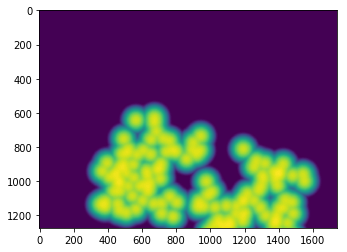

In [26]:
plt.imshow(dmap_q[:,:,2])

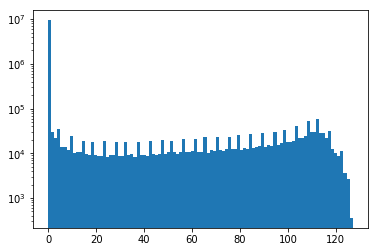

In [27]:
plt.yscale('log')
_ = plt.hist(dmap_q.ravel(), bins=100)

In [28]:
dmap_dq = dequantize(dmap_q, nbins, lmin, lmax)
dmap_rec = from_log_space(dmap_dq)

In [29]:
np.sum(dmap_rec[:,:,2])

113.29707138193152

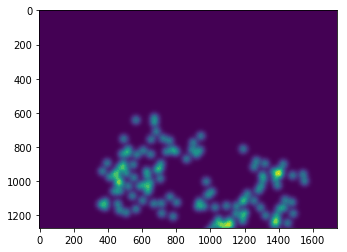

In [30]:
plt.imshow(dmap_rec[:,:,2])

In [31]:
np.sum(dmap[:,:,2])

119.80925

In [32]:
indices, counts = np.unique(dmap_q, return_counts=True)

In [48]:
counts

array([9413775,   46417,   29714,   22353,   18425,   16384,   14139,
         13825,   11904,   12114,   11965,    9924,   10507,   10896,
          9760,    9030,    9811,    9343,    9444,    8903,    8966,
          8879,    8815,    9081,    9413,    8201,    9018,    9126,
          9064,    8941,    8577,    8771,    9666,    8320,    9177,
          9623,    8424,    9035,    9208,    9233,    9305,    8874,
          9828,    9375,    9480,    9384,    9712,    9952,    9553,
          9782,   10479,    9008,   10200,   10696,    9671,   10703,
         10823,    9795,   10574,   10555,   11037,   10140,   11099,
         10919,   10430,   11350,   11369,   10313,   11792,   11407,
         11091,   11593,   11702,   11352,   12418,   11920,   11358,
         12312,   12293,   12044,   13012,   11900,   12905,   12406,
         12856,   13496,   13345,   13492,   14293,   13935,   14087,
         13988,   15370,   14466,   15345,   15295,   15173,   17000,
         16307,   17

In [33]:
np.sum(counts)

11081465

https://blog.fineighbor.com/tensorflow-dealing-with-imbalanced-data-eb0108b10701?gi=7e1c3296d5c5

In [45]:
def get_weights(dmap_q):
    indices, counts = np.unique(dmap_q, return_counts=True)
    median_count = np.sort(counts)[counts.size//2]
    
    weights_per_index = dict()
    
    for i, count in zip(indices, counts):
        weights_per_index[i] = median_count/count
    return weights_per_index

In [46]:
weights_per_index = get_weights(dmap_q)

In [47]:
weights_per_index

{0: 0.0012056799742929908,
 1: 0.24452248098756921,
 2: 0.38197482668102578,
 3: 0.50776182167941664,
 4: 0.61601085481682494,
 5: 0.6927490234375,
 6: 0.8027441827569135,
 7: 0.82097649186256783,
 8: 0.95346102150537637,
 9: 0.9369324748225194,
 10: 0.94860008357709991,
 11: 1.1436920596533655,
 12: 1.0802322261349577,
 13: 1.0416666666666667,
 14: 1.1629098360655739,
 15: 1.2569213732004429,
 16: 1.156864743655081,
 17: 1.2148132291555176,
 18: 1.2018212621770437,
 19: 1.2748511737616535,
 20: 1.2658933749721168,
 21: 1.2782971055299019,
 22: 1.2875779920589903,
 23: 1.2498623499614581,
 24: 1.2057792414745565,
 25: 1.3839775637117424,
 26: 1.258593923264582,
 27: 1.2436993206223976,
 28: 1.2522065313327448,
 29: 1.2694329493345264,
 30: 1.3233065174303369,
 31: 1.2940371679398017,
 32: 1.1742189116490793,
 33: 1.3641826923076923,
 34: 1.2367876212269806,
 35: 1.1794658630364752,
 36: 1.3473409306742641,
 37: 1.2562257885998893,
 38: 1.2326238053866203,
 39: 1.2292862558215099,
 40: 